<a href="https://colab.research.google.com/github/ttobaegi/ML_Python/blob/master/EDA_GA_Revenue_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Setting


In [225]:
import os 
import random

import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew # explore some stats of numeric values

import matplotlib.pyplot as plt
import seaborn as sns
#import squarify # to better understand proportion of categorys - treemap

#importing libs to use on interactive graphs
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

# to convert json in df
import json 
from pandas.io.json import json_normalize # to normalize the json file

# graph setting
plt.style.use('fivethirtyeight')
init_notebook_mode(connected=True)

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
columns = ['device', 'geoNetwork', 'totals', 'trafficSource'] # Columns that have json format

dir_path = "/content/drive/MyDrive/ML/GA_Revenue_Analysis/" # you can change to your local 

# p is a fractional number to skiprows and read just a random sample of the our dataset. 
p = 0.07 # *** In this case we will use 50% of data set *** #

#Code to transform the json format columns in table
def json_read(df):
    #joining the [ path + df received]
    data_frame = dir_path + df
    
    #Importing the dataset
    df = pd.read_csv(data_frame, 
                     converters={column: json.loads for column in columns}, # loading the json columns properly
                     dtype={'fullVisitorId': 'str'}, # transforming this column to string
                     skiprows=lambda i: i>0 and random.random() > p)# Number of rows that will be imported randomly
    
    for column in columns: #loop to finally transform the columns in data frame
        #It will normalize and set the json to a table
        column_as_df = json_normalize(df[column]) 
        # here will be set the name using the category and subcategory of json columns
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns] 
        # after extracting the values, let drop the original columns
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        
    # Printing the shape of dataframes that was imported     
    print(f"Loaded {os.path.basename(data_frame)}. Shape: {df.shape}")
    return df # returning the df after importing and transforming

In [8]:
%%time 
# %%time is used to calculate the timing of code chunk execution #

# We will import the data using the name and extension that will be concatenated with dir_path
df_train = json_read('train.csv') 
# The same to test dataset
#df_test = json_read("test.csv") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



Loaded train.csv. Shape: (62861, 54)
CPU times: user 12.7 s, sys: 1.54 s, total: 14.2 s
Wall time: 33.5 s


In [9]:
df = df_train 
df.shape

(62861, 54)

In [10]:
df.tail()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent
62856,Social,20170104,4676831114906257190,4676831114906257190_1483526811,Not Socially Engaged,1483526811,1,1483526811,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,2,2,NaN,1,NaN,(not set),youtube.com,referral,NaN,not available in demo dataset,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62857,Social,20170104,2042198043275420503,2042198043275420503_1483540075,Not Socially Engaged,1483540075,1,1483540075,Edge,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Italy,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,telecomitalia.it,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,3,3,NaN,1,NaN,(not set),youtube.com,referral,NaN,not available in demo dataset,/yt/about/it/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62858,Social,20170104,7660319315190231588,7660319315190231588_1483548841,Not Socially Engaged,1483548841,1,1483548841,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Serbia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,sbb.rs,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,5,5,NaN,1,NaN,(not set),youtube.com,referral,NaN,not available in demo dataset,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62859,Social,20170104,168043908052904808,168043908052904808_1483541485,Not Socially Engaged,1483541485,1,1483541485,Chrome,not available in demo dataset,not avai

#### DATA

In [11]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.browserVersion', 'device.browserSize',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.isMobile', 'device.mobileDeviceBranding',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.flashVersion', 'device.language', 'device.screenColors',
       'device.screenResolution', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.networkDomain', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits',
       'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.t

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62861 entries, 0 to 62860
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   channelGrouping                                    62861 non-null  object
 1   date                                               62861 non-null  int64 
 2   fullVisitorId                                      62861 non-null  object
 3   sessionId                                          62861 non-null  object
 4   socialEngagementType                               62861 non-null  object
 5   visitId                                            62861 non-null  int64 
 6   visitNumber                                        62861 non-null  int64 
 7   visitStartTime                                     62861 non-null  int64 
 8   device.browser                                     62861 non-null  object
 9   device.browserVer

#### Variable 분류

In [28]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.browserVersion', 'device.browserSize',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.isMobile', 'device.mobileDeviceBranding',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.flashVersion', 'device.language', 'device.screenColors',
       'device.screenResolution', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.networkDomain', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits',
       'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.t

**Key 값인 fullVisitorId 포함하여 컬럼분류**
> 1. str.contains() == True
> 2. Or 조건 : | 사용시 () 괄호로 묶어주기
> 3. Columns (인덱스) 기준으로 분할시 list.append 쓰지 않기
> 4. loc vs iloc [행,열]
>> - loc 정확한 인덱스(컬럼명) 알 때 사용 
>> - iloc 위치로 접근 

In [72]:
device_col = df.columns[(df.columns.str.contains('device')==True) | (df.columns=='fullVisitorId')]
device_col

Index(['fullVisitorId', 'device.browser', 'device.browserVersion',
       'device.browserSize', 'device.operatingSystem',
       'device.operatingSystemVersion', 'device.isMobile',
       'device.mobileDeviceBranding', 'device.mobileDeviceModel',
       'device.mobileInputSelector', 'device.mobileDeviceInfo',
       'device.mobileDeviceMarketingName', 'device.flashVersion',
       'device.language', 'device.screenColors', 'device.screenResolution',
       'device.deviceCategory'],
      dtype='object')

In [70]:
traffic_col = df.columns[(df.columns.str.contains('traffic')==True) | (df.columns=='fullVisitorId')]
traffic_col

Index(['fullVisitorId', 'trafficSource.campaign', 'trafficSource.source',
       'trafficSource.medium', 'trafficSource.keyword',
       'trafficSource.adwordsClickInfo.criteriaParameters',
       'trafficSource.referralPath', 'trafficSource.isTrueDirect',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adContent'],
      dtype='object')

In [73]:
geoNetwork_col = df.columns[(df.columns.str.contains('geoNetwork')==True) | (df.columns=='fullVisitorId')]
geoNetwork_col

Index(['fullVisitorId', 'geoNetwork.continent', 'geoNetwork.subContinent',
       'geoNetwork.country', 'geoNetwork.region', 'geoNetwork.metro',
       'geoNetwork.city', 'geoNetwork.cityId', 'geoNetwork.networkDomain',
       'geoNetwork.latitude', 'geoNetwork.longitude',
       'geoNetwork.networkLocation'],
      dtype='object')

In [76]:
df.loc[:,df.columns.isin(traffic_col)].head(1)    # 분류 잘 되었음

,fullVisitorId,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent
0,3531015320757710684,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Target Variable
totals_col = df.columns[(df.columns.str.contains('totals')==True) | (df.columns=='fullVisitorId')]
totals_col

Index(['fullVisitorId', 'totals.visits', 'totals.hits', 'totals.pageviews',
       'totals.bounces', 'totals.newVisits', 'totals.transactionRevenue'],
      dtype='object')

In [52]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.browserVersion', 'device.browserSize',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.isMobile', 'device.mobileDeviceBranding',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.flashVersion', 'device.language', 'device.screenColors',
       'device.screenResolution', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.networkDomain', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits',
       'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.t

#### Data Preprocessing

##### Datatype

In [16]:
# transform datatype and add variables
from datetime import datetime
df['visitStartTime'].apply(lambda x : str(datetime.fromtimestamp(x).hour)).astype(int)

0         2
1         7
2         0
3        18
4        12
         ..
62856    10
62857    14
62858    16
62859    14
62860     2
Name: visitStartTime, Length: 62861, dtype: int64

In [17]:
df['visitStartTime'].head()

0    1472868337
1    1472801099
2    1472863754
3    1472839261
4    1472820135
Name: visitStartTime, dtype: int64

In [18]:
df['date']= pd.to_datetime(df['date'],format='%Y%m%d')
df['weekday']=df['date'].dt.day
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year
df['visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour)).astype(int))

In [21]:
date_col=['date','weekday','month','year','visitHour']
date_col

['date', 'weekday', 'month', 'year', 'visitHour']

In [24]:
df[date_col].head(1)

,date,weekday,month,year,visitHour
0,2016-09-02,2,9,2016,2


In [27]:
len(df.columns)       # 4개변수 추가됨

58

##### Clean the data : NA
> - 
  


In [102]:
(df[df['totals.transactionRevenue'] != np.NaN]['totals.transactionRevenue'].count()/df.shape[0] ) *100

1.3108286536962503

> Target variable has just 1.3% nonnull values

In [126]:
print(df.isnull().sum()[df.isnull().sum().values!=0])
na_col=df.isnull().sum()[df.isnull().sum().values!=0].index
na_col

totals.pageviews                                    3
totals.bounces                                  31473
totals.newVisits                                13924
totals.transactionRevenue                       62037
trafficSource.keyword                           34942
trafficSource.referralPath                      39746
trafficSource.isTrueDirect                      43839
trafficSource.adwordsClickInfo.page             61371
trafficSource.adwordsClickInfo.slot             61371
trafficSource.adwordsClickInfo.gclId            61360
trafficSource.adwordsClickInfo.adNetworkType    61371
trafficSource.adwordsClickInfo.isVideoAd        61371
trafficSource.adContent                         62113
dtype: int64


Index(['totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.transactionRevenue', 'trafficSource.keyword',
       'trafficSource.referralPath', 'trafficSource.isTrueDirect',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adContent'],
      dtype='object')

> need to drop or fill Na Values for these variables

In [136]:
df[na_col]

,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.keyword,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent
0,1,1,1,NaN,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,NaN,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,1,NaN,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,1,NaN,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62856,2,NaN,1,NaN,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62857,3,NaN,1,NaN,NaN,/yt/about/it/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62858,5,NaN,1,NaN,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62859,7,NaN,1,NaN,NaN,/Where-can-I-buy-a-stuffed-Go-language-gopher-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df['totals.pageviews'].fillna(1, inplace=True)

In [135]:
df['totals.pageviews'].isnull().sum()

0

In [139]:
def FillingNaValues(data):
# filling na with 1 or 0
#    data['totals.pageviews'].fillna(1, inplace=True).astype(int)
    data['totals.newVisits'].fillna(0, inplace=True)#.astype(int)
    data['totals.bounces'].fillna(0, inplace=True)#.astype(int)
    data['totals.transactionRevenue'].fillna(0.0)#.astype(float)
    # filling na - binary
    data['trafficSource.isTrueDirect'].fillna(False, inplace=True)
    data['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True)

    data.loc[df['geoNetwork.city'] =='(not set)','geoNetwork.city'] =np.nan
    data['geoNetwork.city'].fillna('NaN',inplace=True)
    return data

In [140]:
FillingNaValues(df)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,weekday,month,year,visitHour
0,Organic Search,2016-09-02,3531015320757710684,3531015320757710684_1472868337,Not Socially Engaged,1472868337,1,1472868337,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Brazil,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,cabotelecom.com.br,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,False,NaN,NaN,NaN,NaN,True,NaN,2,9,2016,2
1,Organic Search,2016-09-02,9876750586615598787,9876750586615598787_1472801099,Not Socially Engaged,1472801099,1,1472801099,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Western Europe,Netherlands,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,igmholding.nl,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,False,NaN,NaN,NaN,NaN,True,NaN,2,9,2016,7
2,Organic Search,2016-09-02,6098154234696452861,6098154234696452861_1472863754,Not Socially Engaged,1472863754,1,1472863754,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Europe,Western Europe,Germany,(not set),(not set),NaN,not available in demo dataset,live-servers.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),baidu,organic,NaN,not available in demo dataset,NaN,False,NaN,NaN,NaN,NaN,True,NaN,2,9,2016,0
3,Organic Search,2016-09-02,7598520899202646361,7598520899202646361_1472839261,Not Socially Engaged,1472839261,1,1472839261,Chrome,not available in

In [141]:
def NumericalColumns(data):
    data['totals.pageviews'].fillna(1,inplace=True)
    data['totals.newVisits'].fillna(1,inplace=True)
    data['totals.bounces'].fillna(0, inplace=True)
    data['trafficSource.isTrueDirect'].fillna(False, inplace=True)
    data['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True)
    data['totals.transactionRevenue']=data['totals.transactionRevenue'].fillna(0.0).astype(float)
    data['totals.pageviews'] = data['totals.pageviews'].astype(int)
    data['totals.newVisits'] = data['totals.newVisits'].astype(int)
    data['totals.bounces']=data['totals.bounces'].astype(int)
    data['totals.hits']=data['totals.hits'].astype(int)
    data['totals.visits']=data['totals.visits'].astype(int)
    data.loc[df['geoNetwork.city'] =='(not set)','geoNetwork.city'] =np.nan
    data['geoNetwork.city'].fillna('NaN',inplace=True)
    return data

In [142]:
NumericalColumns(df)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,weekday,month,year,visitHour
0,Organic Search,2016-09-02,3531015320757710684,3531015320757710684_1472868337,Not Socially Engaged,1472868337,1,1472868337,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Brazil,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,cabotelecom.com.br,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,0.0,(not set),google,organic,(not provided),not available in demo dataset,NaN,False,NaN,NaN,NaN,NaN,True,NaN,2,9,2016,2
1,Organic Search,2016-09-02,9876750586615598787,9876750586615598787_1472801099,Not Socially Engaged,1472801099,1,1472801099,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Western Europe,Netherlands,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,igmholding.nl,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,0.0,(not set),google,organic,(not provided),not available in demo dataset,NaN,False,NaN,NaN,NaN,NaN,True,NaN,2,9,2016,7
2,Organic Search,2016-09-02,6098154234696452861,6098154234696452861_1472863754,Not Socially Engaged,1472863754,1,1472863754,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Europe,Western Europe,Germany,(not set),(not set),NaN,not available in demo dataset,live-servers.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,0.0,(not set),baidu,organic,NaN,not available in demo dataset,NaN,False,NaN,NaN,NaN,NaN,True,NaN,2,9,2016,0
3,Organic Search,2016-09-02,7598520899202646361,7598520899202646361_1472839261,Not Socially Engaged,1472839261,1,1472839261,Chrome,not available in

##### unnecessary columns
> - constant columns
>> 1. df.col[ ].unique()
>> 2. df.col[ ].nunique()

In [86]:
print(df.columns[0])
print(df[df.columns[0]].unique())
print(df[df.columns[0]].nunique())

channelGrouping
['Organic Search' 'Referral' 'Affiliates' 'Paid Search' 'Direct' 'Social'
 'Display' '(Other)']
8


In [89]:
# COLUMNS TO DROP
const_col = [col for col in df.columns if df[col].nunique() == 1]
const_col

['socialEngagementType',
 'device.browserVersion',
 'device.browserSize',
 'device.operatingSystemVersion',
 'device.mobileDeviceBranding',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.flashVersion',
 'device.language',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'totals.bounces',
 'totals.newVisits',
 'trafficSource.adwordsClickInfo.criteriaParameters',
 'trafficSource.isTrueDirect',
 'trafficSource.adwordsClickInfo.adNetworkType',
 'trafficSource.adwordsClickInfo.isVideoAd']

In [90]:
df['totals.visits']

0        1
1        1
2        1
3        1
4        1
        ..
62856    1
62857    1
62858    1
62859    1
62860    1
Name: totals.visits, Length: 62861, dtype: object

##### Normalize 
> - min max scaler
> - log transformation -> Target Variable : totals.transactionRevenue

In [146]:
from sklearn import preprocessing
def Normalize(data):
    # MinMax Scaler
    data['totals.hits'] = (data['totals.hits']-min(data['totals.hits']))/(max(data['totals.hits'])-min(data['totals.hits']))
    # normalize the transaction Revenue - skewed data normalization log transformation
    data['totals.transactionRevenue']=data['totals.transactionRevenue'].apply(lambda x: np.log1p(x))
    return data

In [147]:
Normalize(df)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,weekday,month,year,visitHour
0,Organic Search,2016-09-02,3531015320757710684,3531015320757710684_1472868337,Not Socially Engaged,1472868337,1,1472868337,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Brazil,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,cabotelecom.com.br,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,0.000000,1,1,1,0.0,(not set),google,organic,(not provided),not available in demo dataset,NaN,False,NaN,NaN,NaN,NaN,True,NaN,2,9,2016,2
1,Organic Search,2016-09-02,9876750586615598787,9876750586615598787_1472801099,Not Socially Engaged,1472801099,1,1472801099,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Western Europe,Netherlands,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,igmholding.nl,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,0.000000,1,1,1,0.0,(not set),google,organic,(not provided),not available in demo dataset,NaN,False,NaN,NaN,NaN,NaN,True,NaN,2,9,2016,7
2,Organic Search,2016-09-02,6098154234696452861,6098154234696452861_1472863754,Not Socially Engaged,1472863754,1,1472863754,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Europe,Western Europe,Germany,(not set),(not set),NaN,not available in demo dataset,live-servers.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,0.000000,1,1,1,0.0,(not set),baidu,organic,NaN,not available in demo dataset,NaN,False,NaN,NaN,NaN,NaN,True,NaN,2,9,2016,0
3,Organic Search,2016-09-02,7598520899202646361,7598520899202646361_1472839261,Not Socially Engaged,1472839261,1,1472839261,Ch

###EDA


#### **Target Variable**

reset_index()
> 1. 인덱스 리셋, 인덱스 값을 Dataframe열로 전송하여 새로운 정수 인덱스 세팅
> 2. set_index()의 기능 역으로 수행
> 3. DataFrame.reset_index(drop=False, inplace=False)

In [148]:
# target variable
df['totals.transactionRevenue'].astype('float')

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
62856    0.0
62857    0.0
62858    0.0
62859    0.0
62860    0.0
Name: totals.transactionRevenue, Length: 62861, dtype: float64

In [157]:
gdf=df.groupby('fullVisitorId')['totals.transactionRevenue'].sum().reset_index()
gdf.head()

,fullVisitorId,totals.transactionRevenue
0,0000485418944539313,0.0
1,0000649777500417577,0.0
2,0000702913088027926,0.0
3,0000712751584756636,0.0
4,0000750929315523353,0.0


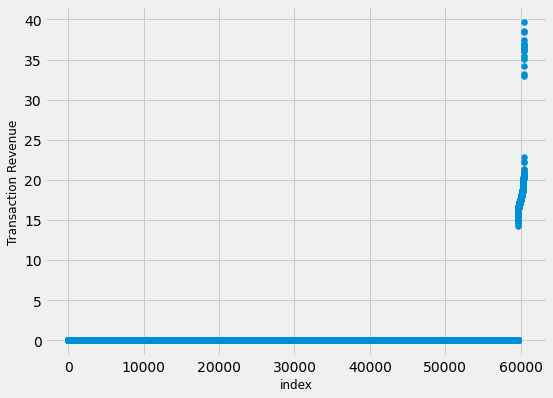

In [159]:
plt.figure(figsize =(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(gdf['totals.transactionRevenue'].values))
plt.xlabel('index', fontsize = 12)
plt.ylabel('Transaction Revenue', fontsize = 12)
plt.show()

the 80/20 rule has proven true for many businesses - only a small percentage of customers produce most of the revenue. As such marketing teams are challenged to make appropriate investments in promotional strategies.

In [173]:
(df[df['totals.transactionRevenue']!=0].shape[0] / df.shape[0])*100

1.3108286536962503

the ratio of revenue generating customers to customers with no revenue is 1.3%

#### **Number of visitors**

In [177]:
print('Number of unique visitors :',df.fullVisitorId.nunique(),' out of ' , df.shape[0] )

Number of unique visitors : 60409  out of  62861


#### **Device Information**

> Device Browser

In [202]:
device_browser=df.groupby('device.browser')['totals.transactionRevenue'].agg(['size','count','mean'])
device_browser.columns=['count','count of non-zero revenue', 'mean']
device_browser = device_browser.sort_values(by='count', ascending=False)
device_browser

,count,count of non-zero revenue,mean
device.browser,,,
Chrome,43353,43353,0.302370
Safari,12456,12456,0.099607
Firefox,2551,2551,0.071232
Internet Explorer,1316,1316,0.052218
Edge,700,700,0.076427
Android Webview,576,576,0.028564
Safari (in-app),517,517,0.000000
Opera Mini,440,440,0.000000
Opera,398,398,0.000000


Text(0.5, 1.0, 'Top 10 Device browser')

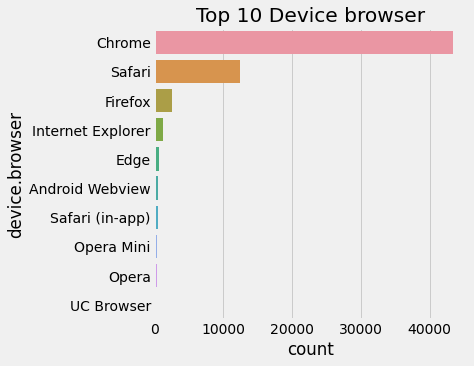

In [224]:
plt.figure(figsize=(5,5))
sns.barplot(data=device_browser,
            y=device_browser.head(10).index,
            x=device_browser.head(10)['count'],
            ).set_title('Top 10 Device browser')

In [ ]:
(())